# Particle-in-a-box wavefunctions

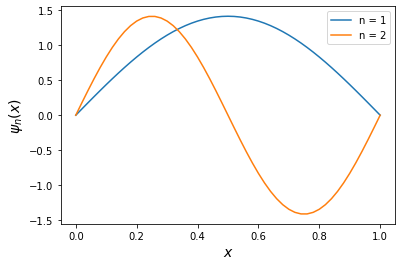

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def psi(n,L,x):
    psi=np.sqrt(2.0/L)*np.sin(n*np.pi*x/L)
    return psi
    
L=1.0

x=np.linspace(0.0, L, 51)

f1=np.zeros(51)
f2=np.zeros(51)

for i in range(51):
    f1[i]=psi(1,L,x[i])
    f2[i]=psi(2,L,x[i])

plt.plot(x,f1)
plt.plot(x,f2)
plt.legend(['n = 1','n = 2'])

plt.xlabel("$x$", fontsize=14)
plt.ylabel("$\psi_n(x)$", fontsize=14)
plt.savefig('PIB.png') 
plt.show()

# Non-stationary state

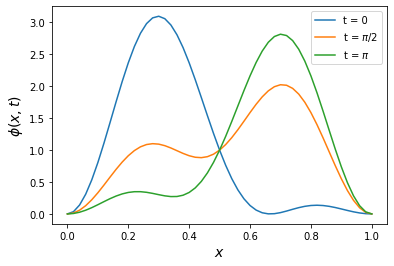

In [2]:
t=np.linspace(0.0, 1.0, 51)

hbar=1                # in atomic units
mass_e=1              # in atomic units

h=2*np.pi * hbar 

E1=1**2 * h**2/(8*mass_e*L**2)
E2=2**2 * h**2/(8*mass_e*L**2)
w21 = (E2-E1)/hbar

def phi(t):
    phi=np.zeros(51)
    phi=(f1**2 + f2**2)/2+np.cos(w21*t)*f1*f2
    return phi

plt.plot(x,phi(0))
plt.plot(x,phi(np.pi/2))
plt.plot(x,phi(np.pi))
plt.legend(['t = 0','t = $\pi$/2','t = $\pi$'])

plt.xlabel("$x$", fontsize=14)
plt.ylabel("$\phi(x,t)$", fontsize=14)
plt.savefig('PIB_2.png') 
plt.show()

# Time-evolution movie

In [3]:
import os
import imageio
filenames = []
for it in range (100):
    t=it*0.01
    
    plt.plot(x,phi(t))

    plt.xlim(0, L)
    plt.ylim(0, 3.5)
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$\phi(x,t)$", fontsize=14)
    plt.text(0.2,0.15, r'$t=$ {0:10.3f} [au]'.format(t), fontsize=12)
    
    filename='_tmp_'+str(it).zfill(5)+'.png'
    filenames.append(filename)
    plt.savefig(filename)

    plt.close()
    
# build animated gif
with imageio.get_writer('PIB_t.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# remove temporary files
for filename in set(filenames):
    os.remove(filename)